# Import Data

In [ ]:
!pip install -q gwpy

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 11.2 MB 70.3 MB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
     |████████████████████████████████| 4.0 MB 57.1 MB/s 
     |████████████████████████████████| 965 kB 82.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c diabetic-retinopathy-detection

100%|█████████████████████████████████████▉| 82.2G/82.2G [23:46<00:00, 76.6MB/s]
100%|██████████████████████████████████████| 82.2G/82.2G [23:46<00:00, 61.9MB/s]


In [3]:
!cp diabetic-retinopathy-detection.zip /tmp
!ls -l /tmp

total 86241176
-rw-r--r-- 1 root root 88310951633 Dec 15 22:51 diabetic-retinopathy-detection.zip


In [15]:
!unzip /tmp/diabetic-retinopathy-detection.zip -d /tmp

Archive:  /tmp/diabetic-retinopathy-detection.zip
  inflating: /tmp/sample.zip         
  inflating: /tmp/sampleSubmission.csv.zip  
  inflating: /tmp/test.zip.001       
  inflating: /tmp/test.zip.002       
  inflating: /tmp/test.zip.003       
  inflating: /tmp/test.zip.004       
  inflating: /tmp/test.zip.005       
  inflating: /tmp/test.zip.006       
  inflating: /tmp/test.zip.007       
  inflating: /tmp/train.zip.001      
  inflating: /tmp/train.zip.002      
  inflating: /tmp/train.zip.003      
  inflating: /tmp/train.zip.004      
  inflating: /tmp/train.zip.005      
  inflating: /tmp/trainLabels.csv.zip  


In [22]:
!ls -R /tmp

/tmp:


In [11]:
!cat /tmp/train.zip.* > train.zip
!unzip train.zip

#!unzip trainLabels.csv.zip -d  DLdata
#!rm -f train.zip.*
#!cat test.zip.* > test.zip
#!unzip test.zip -d DLdata
#!rm -f test.zip

Archive:  train.zip
   creating: train/
  inflating: train/10003_left.jpeg   
  inflating: train/10003_right.jpeg  
  inflating: train/10007_left.jpeg   
  inflating: train/10007_right.jpeg  
  inflating: train/10009_left.jpeg   
  inflating: train/10009_right.jpeg  
  inflating: train/1000_left.jpeg    
  inflating: train/1000_right.jpeg   
  inflating: train/10010_left.jpeg   
  inflating: train/10010_right.jpeg  
  inflating: train/10013_left.jpeg   
  inflating: train/10013_right.jpeg  
  inflating: train/10014_left.jpeg   
  inflating: train/10014_right.jpeg  
  inflating: train/10015_left.jpeg   
  inflating: train/10015_right.jpeg  
  inflating: train/10017_left.jpeg   
  inflating: train/10017_right.jpeg  
  inflating: train/10022_left.jpeg   
  inflating: train/10022_right.jpeg  
  inflating: train/10028_left.jpeg   
  inflating: train/10028_right.jpeg  
  inflating: train/10029_left.jpeg   
  inflating: train/10029_right.jpeg  
  inflating: train/1002_left.jpeg    
  inflatin

In [14]:
!cat tmp/test.zip.* > test.zip
!unzip test.zip

cat: 'tmp/test.zip.*': No such file or directory
Archive:  test.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of test.zip or
        test.zip.zip, and cannot find test.zip.ZIP, period.


# Pre-processing data

In [1]:
import pandas as pd
from keras.utils import to_categorical
df = pd.read_csv('trainLabels.csv',dtype=str)
df['image_path'] = df['image'].map(lambda x: x+'.jpeg')
df.head()

,image,level,image_path
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,15_left,1,15_left.jpeg


In [2]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_df,validation_df=train_test_split(df,test_size=0.15)
print(train_df.shape,validation_df.shape)

(29857, 3) (5269, 3)


In [10]:
test_df = pd.read_csv('retinopathy_solution.csv',dtype=str)
test_df['image_path'] = test_df['image'].map(lambda x: x+'.jpeg')
test_df.head()
print(test_df.shape)

(53576, 4)


In [ ]:
path = '/content/drive/MyDrive/DLdata/train/'

In [5]:
# The mode of image
from PIL import Image
Image.open("train/10_left.jpeg").mode

'RGB'

In [3]:
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

# Instantiate ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255)

# Configure train data generator
train_gen=train_datagen.flow_from_dataframe( 
    train_df,                                
    directory="train/",    
    x_col="image_path",             
    y_col="level",                          
    target_size=(400, 400),            
    color_mode="rgb",               
    class_mode="categorical",                 
    batch_size=32,
    shuffle=True)  

# Configure validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_dataframe(
    validation_df,
    directory="train/",
    x_col="image_path",
    y_col="level",
    target_size=(400, 400),
    color_mode="rgb",
    class_mode="categorical",
    )
# Configure test data generator
#test_datagen = ImageDataGenerator(rescale=1./255)
#test_gen=test_datagen.flow_from_dataframe(
#    test_df,
#   directory="/content/drive/MyDrive/DLdata/test",
#    x_col="image_path",
#    y_col="level",
#    target_size=(256, 256),
#    color_mode="rgb",
#    class_mode="categorical",
#    validate_filenames=True,
#    )

Found 29857 validated image filenames belonging to 5 classes.
Found 5269 validated image filenames belonging to 5 classes.


# Use CNN - no pretrained model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback 

# Build sequential model
model=Sequential()
model.add(Conv2D(258, 3,input_shape=(400,400,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.2))                                                        
model.add(Dense(64,activation="relu", kernel_regularizer="l2"))
model.add(Dense(32,activation="relu"))
model.add(Dense(5,activation="sigmoid"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['acc'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [ ]:
# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch = 100,
      epochs=20,
      validation_data=val_gen,
      validation_steps=100, #val_gen.n//val_gen.batch_size
      callbacks=[Es])  

Epoch 1/20
100/100 [==============================] - 1086s 11s/step - loss: 1.2719 - acc: 0.7153 - val_loss: 0.9313 - val_acc: 0.7347
Epoch 2/20
100/100 [==============================] - 1006s 10s/step - loss: 0.9276 - acc: 0.7347 - val_loss: 0.9031 - val_acc: 0.7362
Epoch 3/20
100/100 [==============================] - 992s 10s/step - loss: 0.8874 - acc: 0.7355 - val_loss: 0.8623 - val_acc: 0.7409
Epoch 4/20
100/100 [==============================] - 1003s 10s/step - loss: 0.8789 - acc: 0.7431 - val_loss: 0.9257 - val_acc: 0.7309
Epoch 5/20
100/100 [==============================] - 988s 10s/step - loss: 0.8800 - acc: 0.7422 - val_loss: 0.9061 - val_acc: 0.7272
Epoch 6/20
100/100 [==============================] - 981s 10s/step - loss: 0.8922 - acc: 0.7325 - val_loss: 0.8676 - val_acc: 0.7419
Epoch 7/20
100/100 [==============================] - 968s 10s/step - loss: 0.8972 - acc: 0.7287 - val_loss: 0.8459 - val_acc: 0.7484
Epoch 8/20
100/100 [==============================] - 1002s

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 258)     7224      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 258)    0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      148672    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dropout_4 (Dropout)         (None, 246016)           

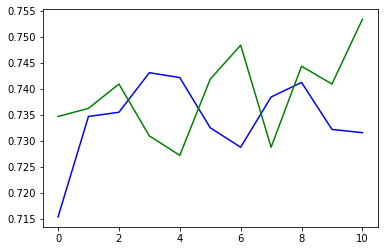

In [ ]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='g')
plt.show()

### Here we can see the training and validation accuracy is similar at around 0.73. Therefore we have an underfitting problem: we need more complex neural network and more training.


Changes:

* Increase filter layers in convolutional layers - trying to preserve more information  
* Add more Dense layers
*   Get rid of dropout layers, regularizers, and early stopping
*   Decrease batch size (increase step per epoch) to increase computation speed
* Increase epoch - more training




In [5]:
from keras.callbacks import *
filepath = 'epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping 
# Build sequential model
model=Sequential()
model.add(Conv2D(256, 2,input_shape=(400,400,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, 2,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 2,activation="relu"))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="relu")) 
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))  
model.add(Dense(256,activation="relu")) 
model.add(Dense(256,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(5,activation="softmax"))




In [ ]:
#model.load_weights('/content/drive/MyDrive/DLdata/epochs:003-val_acc:0.752.hdf5')

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer="SGD",
              metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 399, 399, 256)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 198, 198, 256)     262400    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 99, 99, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 98, 98, 128)       131200    
                                                                 
 flatten (Flatten)           (None, 1229312)           0

In [ ]:
whistory=model.fit(train_gen,
      steps_per_epoch = 300,
      epochs=70,
      validation_data=val_gen,
      validation_steps=100,
      callbacks=callbacks_list)  

Epoch 1/70


2022-12-18 02:01:33.227378: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


300/300 [==============================] - ETA: 0s - loss: 0.9309 - acc: 0.7307
Epoch 1: saving model to epochs:001-val_acc:0.736.hdf5


2022-12-18 02:15:25.193093: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 842s 3s/step - loss: 0.9309 - acc: 0.7307 - val_loss: 0.8579 - val_acc: 0.7356
Epoch 2/70
300/300 [==============================] - ETA: 0s - loss: 0.8822 - acc: 0.7307
Epoch 2: saving model to epochs:002-val_acc:0.741.hdf5


2022-12-18 02:26:53.235790: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 688s 2s/step - loss: 0.8822 - acc: 0.7307 - val_loss: 0.8490 - val_acc: 0.7406
Epoch 3/70
300/300 [==============================] - ETA: 0s - loss: 0.8750 - acc: 0.7338
Epoch 3: saving model to epochs:003-val_acc:0.731.hdf5


2022-12-18 02:37:42.235526: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 650s 2s/step - loss: 0.8750 - acc: 0.7338 - val_loss: 0.8648 - val_acc: 0.7306
Epoch 4/70
300/300 [==============================] - ETA: 0s - loss: 0.8872 - acc: 0.7290
Epoch 4: saving model to epochs:004-val_acc:0.740.hdf5


2022-12-18 02:51:02.838431: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 768s 3s/step - loss: 0.8872 - acc: 0.7290 - val_loss: 0.8551 - val_acc: 0.7403
Epoch 5/70
300/300 [==============================] - ETA: 0s - loss: 0.8718 - acc: 0.7338
Epoch 5: saving model to epochs:005-val_acc:0.741.hdf5


2022-12-18 03:00:28.525344: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 576s 2s/step - loss: 0.8718 - acc: 0.7338 - val_loss: 0.8463 - val_acc: 0.7412
Epoch 6/70
300/300 [==============================] - ETA: 0s - loss: 0.8510 - acc: 0.7435
Epoch 6: saving model to epochs:006-val_acc:0.735.hdf5
300/300 [==============================] - 792s 3s/step - loss: 0.8510 - acc: 0.7435 - val_loss: 0.8588 - val_acc: 0.7347
Epoch 7/70
300/300 [==============================] - ETA: 0s - loss: 0.8702 - acc: 0.7312
Epoch 7: saving model to epochs:007-val_acc:0.741.hdf5
300/300 [==============================] - 894s 3s/step - loss: 0.8702 - acc: 0.7312 - val_loss: 0.8359 - val_acc: 0.7409
Epoch 8/70
300/300 [==============================] - ETA: 0s - loss: 0.8645 - acc: 0.7382
Epoch 8: saving model to epochs:008-val_acc:0.732.hdf5
300/300 [==============================] - 680s 2s/step - loss: 0.8645 - acc: 0.7382 - val_loss: 0.8669 - val_acc: 0.7316
Epoch 9/70
300/300 [==============================] - ETA: 0s - loss: 0.85

In [ ]:
# continue to train
model.load_weights('/notebooks/epochs:023-val_acc:0.745.hdf5')
history=model.fit(train_gen,
      steps_per_epoch = 300,
      epochs=80,
      validation_data=val_gen,
      validation_steps=100,
      callbacks=callbacks_list)  

Epoch 1/80


2022-12-18 16:18:25.604267: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


300/300 [==============================] - ETA: 0s - loss: 0.8662 - acc: 0.7309
Epoch 1: saving model to epochs:001-val_acc:0.742.hdf5
300/300 [==============================] - 764s 3s/step - loss: 0.8662 - acc: 0.7309 - val_loss: 0.8492 - val_acc: 0.7419
Epoch 2/80
300/300 [==============================] - ETA: 0s - loss: 0.8802 - acc: 0.7278
Epoch 2: saving model to epochs:002-val_acc:0.743.hdf5
300/300 [==============================] - 755s 3s/step - loss: 0.8802 - acc: 0.7278 - val_loss: 0.8330 - val_acc: 0.7428
Epoch 3/80
300/300 [==============================] - ETA: 0s - loss: 0.8553 - acc: 0.7379
Epoch 3: saving model to epochs:003-val_acc:0.739.hdf5
300/300 [==============================] - 600s 2s/step - loss: 0.8553 - acc: 0.7379 - val_loss: 0.8379 - val_acc: 0.7387
Epoch 4/80
300/300 [==============================] - ETA: 0s - loss: 0.8594 - acc: 0.7328
Epoch 4: saving model to epochs:004-val_acc:0.742.hdf5
300/300 [==============================] - 612s 2s/step - los

In [8]:
# continue to train
model.load_weights('/notebooks/epochs:033-val_acc:0.733.hdf5')
history=model.fit(train_gen,
      steps_per_epoch = 300,
      epochs=30,
      validation_data=val_gen,
      validation_steps=100,
      callbacks=callbacks_list)  

2022-12-18 22:25:53.408148: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


Epoch 1/30


2022-12-18 22:26:03.179979: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


300/300 [==============================] - ETA: 0s - loss: 0.8407 - acc: 0.7314
Epoch 1: saving model to epochs:001-val_acc:0.728.hdf5


2022-12-18 22:39:18.509512: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 812s 3s/step - loss: 0.8407 - acc: 0.7314 - val_loss: 0.8527 - val_acc: 0.7278
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.8242 - acc: 0.7397
Epoch 2: saving model to epochs:002-val_acc:0.731.hdf5


2022-12-18 22:50:46.151376: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 681s 2s/step - loss: 0.8242 - acc: 0.7397 - val_loss: 0.8318 - val_acc: 0.7306
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.8447 - acc: 0.7334
Epoch 3: saving model to epochs:003-val_acc:0.728.hdf5


2022-12-18 23:01:12.739931: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 634s 2s/step - loss: 0.8447 - acc: 0.7334 - val_loss: 0.8510 - val_acc: 0.7281
Epoch 4/30
300/300 [==============================] - ETA: 0s - loss: 0.8464 - acc: 0.7285
Epoch 4: saving model to epochs:004-val_acc:0.725.hdf5


2022-12-18 23:12:26.624164: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5035261952 exceeds 10% of free system memory.


300/300 [==============================] - 671s 2s/step - loss: 0.8464 - acc: 0.7285 - val_loss: 0.8547 - val_acc: 0.7250
Epoch 5/30
300/300 [==============================] - ETA: 0s - loss: 0.8360 - acc: 0.7359
Epoch 5: saving model to epochs:005-val_acc:0.733.hdf5
300/300 [==============================] - 652s 2s/step - loss: 0.8360 - acc: 0.7359 - val_loss: 0.8342 - val_acc: 0.7325
Epoch 6/30
300/300 [==============================] - ETA: 0s - loss: 0.8276 - acc: 0.7367
Epoch 6: saving model to epochs:006-val_acc:0.729.hdf5
300/300 [==============================] - 780s 3s/step - loss: 0.8276 - acc: 0.7367 - val_loss: 0.8355 - val_acc: 0.7294
Epoch 7/30
300/300 [==============================] - ETA: 0s - loss: 0.8243 - acc: 0.7340
Epoch 7: saving model to epochs:007-val_acc:0.730.hdf5
300/300 [==============================] - 613s 2s/step - loss: 0.8243 - acc: 0.7340 - val_loss: 0.8484 - val_acc: 0.7300
Epoch 8/30
300/300 [==============================] - ETA: 0s - loss: 0.82

# Using Pre-trained model (EfficientNetB0)

In [4]:
from keras.applications import EfficientNetB0

conv_base = EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(400, 400, 3))


16705208/16705208 [==============================] - 0s 0us/step


In [5]:
conv_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 400, 400, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 400, 400, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 400, 400, 3)  0           ['normalization[0][0

In [6]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name == 'top_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten

model = Sequential()
conv_base.trainable=False  
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation="relu")) 
model.add(Dense(256,activation="relu")) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['acc'])



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 13, 13, 1280)     4049571   
                                                                 
 flatten (Flatten)           (None, 216320)            0         
                                                                 
 dense (Dense)               (None, 512)               110756352 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8

In [ ]:
# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch = 300,
      epochs=100,
      validation_data=val_gen,
      validation_steps=100)  

Epoch 1/100
300/300 [==============================] - 826s 3s/step - loss: 2.6869 - acc: 0.6923 - val_loss: 0.9193 - val_acc: 0.7244
Epoch 2/100
300/300 [==============================] - 744s 2s/step - loss: 0.9081 - acc: 0.7336 - val_loss: 0.8764 - val_acc: 0.7306
Epoch 3/100
300/300 [==============================] - 613s 2s/step - loss: 0.9156 - acc: 0.7348 - val_loss: 0.9228 - val_acc: 0.7191
Epoch 4/100
300/300 [==============================] - 582s 2s/step - loss: 0.8886 - acc: 0.7350 - val_loss: 0.8957 - val_acc: 0.7369
Epoch 5/100
300/300 [==============================] - 567s 2s/step - loss: 0.8641 - acc: 0.7396 - val_loss: 0.9209 - val_acc: 0.7262
Epoch 6/100
300/300 [==============================] - 556s 2s/step - loss: 0.8800 - acc: 0.7362 - val_loss: 0.8991 - val_acc: 0.7272
Epoch 7/100
300/300 [==============================] - 610s 2s/step - loss: 0.8787 - acc: 0.7347 - val_loss: 0.8905 - val_acc: 0.7284
Epoch 8/100
300/300 [==============================] - 799s 3s

In [ ]:
model.save('DRdetection.h5')